In [193]:
import pandas as pd
import numpy as np
import random

# Define constants for the dataset
lead_sources = ["Google Ads", "Social Media", "Email Campaign", "Trade Show", "Referral", "Direct Traffic"]
lead_types = ["Inbound", "Outbound", "Referral"]
industries = ["Tech", "Finance", "Healthcare", "Education", "Retail"]
regions = ["North America", "Europe", "Asia", "South America", "Africa"]
lead_statuses = ["New", "Contacted", "Qualified", "Unqualified"]
campaign_names = ["Spring Promo 2024", "Tech Expo", "Holiday Discount", "Webinar Series", "Event Booth"]
marketing_channels = ["Paid", "Organic", "Event", "Referral"]

# Generate data
np.random.seed(42)
num_records = 300

data = {
    "Lead_ID": [f"LEAD{i:05d}" for i in range(1, num_records + 1)],
    "Lead_Source": np.random.choice(lead_sources, num_records),
    "Lead_Type": np.random.choice(lead_types, num_records),
    "Industry": np.random.choice(industries, num_records),
    "Region": np.random.choice(regions, num_records),
    "Lead_Status": np.random.choice(lead_statuses, num_records, p=[0.4, 0.3, 0.2, 0.1]),
    "Engagement_Score": np.random.randint(1, 100, num_records),
    "Touchpoints_Count": np.random.randint(1, 15, num_records),
    "Last_Engagement_Date": [pd.Timestamp("2024-01-01") + pd.to_timedelta(random.randint(0, 180), unit="d") for _ in range(num_records)],
    "Deal_Size": np.random.uniform(1000, 50000, num_records),
    "Conversion_Flag": np.random.choice([0, 1], num_records, p=[0.7, 0.3]),
    "Campaign_Name": np.random.choice(campaign_names, num_records),
    "Marketing_Channel": np.random.choice(marketing_channels, num_records),
    "Lead_Age": np.random.randint(1, 365, num_records),  # Days since creation
    "Cost_per_Lead": np.random.uniform(50, 500, num_records),
    "Attribution_Model": np.random.choice(["First Touch", "Last Touch"], num_records)
}

# Create DataFrame
marketing_data_df = pd.DataFrame(data)

# Save to CSV
marketing_data_df.to_csv("marketing_data.csv", index=False)

print("Marketing data saved as 'marketing_data.csv'")


Marketing data saved as 'marketing_data.csv'


In [195]:
marketing_df = pd.read_csv("marketing_data.csv")
marketing_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
1,LEAD00002,Referral,Inbound,Healthcare,South America,Qualified,12,2,2024-04-11,1126.616727,0,Webinar Series,Paid,141,328.880557,First Touch
2,LEAD00003,Email Campaign,Referral,Finance,North America,Qualified,22,7,2024-03-04,32261.275084,0,Tech Expo,Organic,232,453.233800,Last Touch
3,LEAD00004,Referral,Inbound,Retail,North America,Qualified,17,6,2024-05-01,26243.583346,1,Event Booth,Referral,136,431.237498,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch


In [197]:
lead_source_summary = marketing_df.groupby("Lead_Source").agg(
    Total_Leads=("Lead_Source", "count"),
    Avg_Engagement=("Engagement_Score", "mean")
)
lead_source_summary.head()

,Total_Leads,Avg_Engagement
Lead_Source,,
Direct Traffic,46,51.369565
Email Campaign,52,50.730769
Google Ads,57,42.631579
Referral,39,49.153846
Social Media,42,52.928571


In [199]:
print(marketing_df["Lead_Status"].unique())

['New' 'Qualified' 'Contacted' 'Unqualified']


In [201]:
region_source_pivot = marketing_df.pivot_table(
    values="Deal_Size",
    index="Region",
    columns="Lead_Source",
    aggfunc="mean"
)
region_source_pivot.head()

Lead_Source,Direct Traffic,Email Campaign,Google Ads,Referral,Social Media,Trade Show
Region,,,,,,
Africa,22219.847969,22097.383611,20734.143494,26489.473756,21723.392865,20828.708877
Asia,29966.144964,18506.962007,16545.155779,33266.316244,38396.192875,19764.929362
Europe,22478.999301,10291.502456,24925.481848,18587.466310,34785.869829,22102.938159
North America,31998.133175,27831.431043,23215.494676,26914.172219,35161.599574,17632.388434
South America,25997.610064,27932.831755,23023.755398,22837.652129,20971.151877,27382.863001


In [203]:
campaign_summary = marketing_df.pivot_table(
    values="Lead_ID",
    index="Campaign_Name",
    columns="Region",
    aggfunc="count"
)
campaign_summary["Total"] = campaign_summary.sum(axis=1)
campaign_summary.loc["Grand Total"] = campaign_summary.sum()
display(campaign_summary)

# first time I recall having added total columns/rows in this fashion (particularly rows)
# so the .loc is used to add the rows

Region,Africa,Asia,Europe,North America,South America,Total
Campaign_Name,,,,,,
Event Booth,11,11,7,16,13,58
Holiday Discount,7,14,15,15,14,65
Spring Promo 2024,18,17,14,10,12,71
Tech Expo,10,8,5,11,8,42
Webinar Series,12,15,12,15,10,64
Grand Total,58,65,53,67,57,300


In [205]:
# some of the data is structured in a bit of a funny way. But we'll pretend that the conversion flag is correct
# in this next cell we're going to try work out the cost per converted lead average for each campaign
# this will help us work out which campaigns are high / low ROI
marketing_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
1,LEAD00002,Referral,Inbound,Healthcare,South America,Qualified,12,2,2024-04-11,1126.616727,0,Webinar Series,Paid,141,328.880557,First Touch
2,LEAD00003,Email Campaign,Referral,Finance,North America,Qualified,22,7,2024-03-04,32261.275084,0,Tech Expo,Organic,232,453.233800,Last Touch
3,LEAD00004,Referral,Inbound,Retail,North America,Qualified,17,6,2024-05-01,26243.583346,1,Event Booth,Referral,136,431.237498,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch


In [207]:
campaign_ROI = marketing_df.groupby("Campaign_Name").agg(
    total_cost=("Cost_per_Lead", "sum"),
    total_converted=("Conversion_Flag", "sum")
)
campaign_ROI["Cost_Per_Converted_Lead"] = campaign_ROI["total_cost"] / campaign_ROI["total_converted"]
campaign_ROI["Cost_Per_Converted_Lead"] = campaign_ROI["Cost_Per_Converted_Lead"].round(2)
display(campaign_ROI)

# suggested improvements - add a safeguard for 0 values after CPL calculation ".replace(0, np.nan)"

,total_cost,total_converted,Cost_Per_Converted_Lead
Campaign_Name,,,
Event Booth,17366.308525,23,755.06
Holiday Discount,18378.510490,20,918.93
Spring Promo 2024,18274.636828,24,761.44
Tech Expo,12489.122164,10,1248.91
Webinar Series,18161.285130,20,908.06


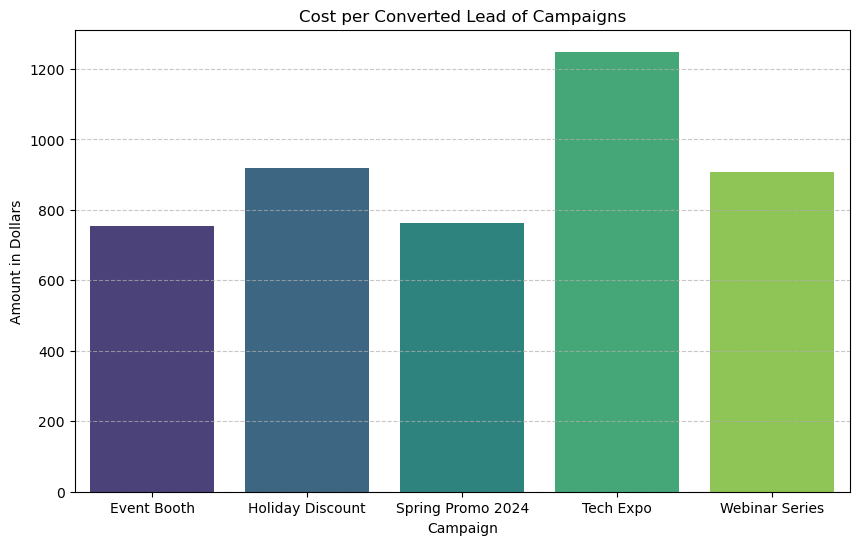

In [209]:
campaign_ROI_reset = campaign_ROI.reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=campaign_ROI_reset,
    x="Campaign_Name",
    y="Cost_Per_Converted_Lead",
    hue="Campaign_Name",
    palette="viridis",
    dodge=False
)
plt.title("Cost per Converted Lead of Campaigns")
plt.ylabel("Amount in Dollars")
plt.xlabel("Campaign")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [210]:
marketing_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
1,LEAD00002,Referral,Inbound,Healthcare,South America,Qualified,12,2,2024-04-11,1126.616727,0,Webinar Series,Paid,141,328.880557,First Touch
2,LEAD00003,Email Campaign,Referral,Finance,North America,Qualified,22,7,2024-03-04,32261.275084,0,Tech Expo,Organic,232,453.233800,Last Touch
3,LEAD00004,Referral,Inbound,Retail,North America,Qualified,17,6,2024-05-01,26243.583346,1,Event Booth,Referral,136,431.237498,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch


In [213]:
region_lead_types = marketing_df.pivot_table(
    values="Lead_ID",
    index="Region",
    columns="Lead_Type",
    aggfunc="count"
)
display(region_lead_types)

Lead_Type,Inbound,Outbound,Referral
Region,,,
Africa,27,12,19
Asia,30,22,13
Europe,17,17,19
North America,19,31,17
South America,19,21,17


In [215]:
display(region_lead_types)

Lead_Type,Inbound,Outbound,Referral
Region,,,
Africa,27,12,19
Asia,30,22,13
Europe,17,17,19
North America,19,31,17
South America,19,21,17


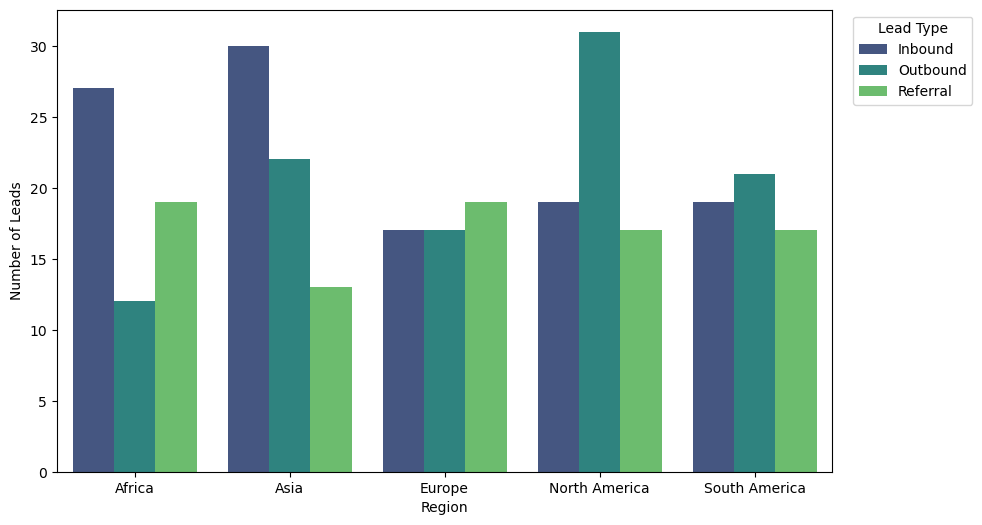

In [217]:
region_lead_types_melted = region_lead_types.reset_index().melt(
    id_vars="Region",
    var_name="Lead_Type",
    value_name="Number of Leads"
)
plt.figure(figsize=(10,6))
sns.barplot(
    data=region_lead_types_melted,
    y="Number of Leads",
    x="Region",
    hue="Lead_Type",
    palette="viridis"
)
plt.legend(title="Lead Type", bbox_to_anchor=(1.19,1), loc="upper right")
plt.show()

In [218]:
region_type_conversion = marketing_df.pivot_table(
    values="Conversion_Flag",
    index="Region",
    columns="Lead_Type",
    aggfunc="sum"
)
display(region_type_conversion)

Lead_Type,Inbound,Outbound,Referral
Region,,,
Africa,9,5,7
Asia,11,4,4
Europe,6,4,7
North America,9,8,3
South America,7,6,7


In [221]:
region_type_totals = marketing_df.pivot_table(
    values="Lead_ID",
    index="Region",
    columns="Lead_Type",
    aggfunc="count"
)
display(region_type_totals)

Lead_Type,Inbound,Outbound,Referral
Region,,,
Africa,27,12,19
Asia,30,22,13
Europe,17,17,19
North America,19,31,17
South America,19,21,17


In [223]:
region_type_conversion_rate = (region_type_conversion / region_type_totals) * 100
region_type_conversion_rate = region_type_conversion_rate.round(2)
display(region_type_conversion_rate)

Lead_Type,Inbound,Outbound,Referral
Region,,,
Africa,33.33,41.67,36.84
Asia,36.67,18.18,30.77
Europe,35.29,23.53,36.84
North America,47.37,25.81,17.65
South America,36.84,28.57,41.18


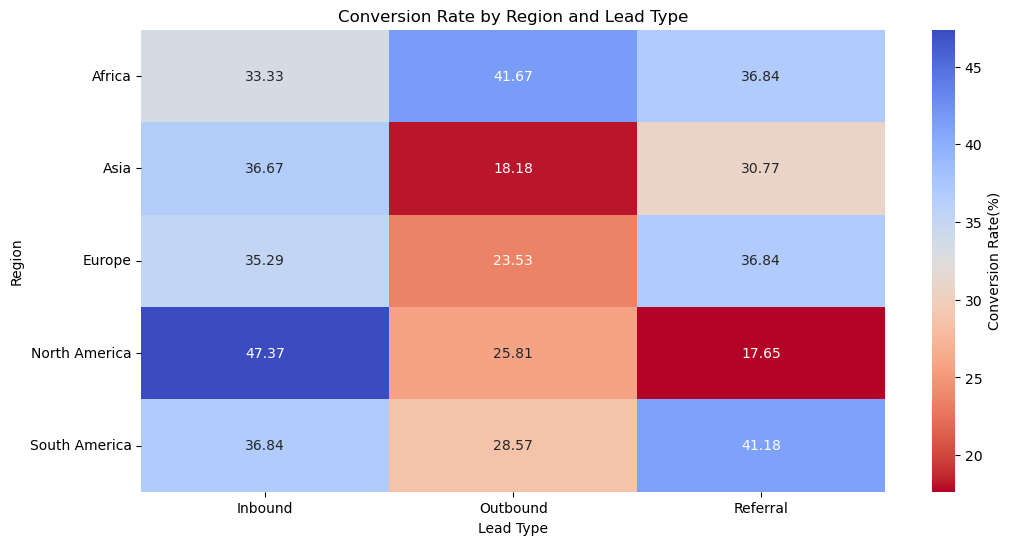

In [225]:
plt.figure(figsize=(12,6))
sns.heatmap(
    region_type_conversion_rate,
    annot=True,
    fmt=".2f",
    cmap="coolwarm_r",
    cbar_kws={"label": "Conversion Rate(%)"}
)
plt.title("Conversion Rate by Region and Lead Type")
plt.xlabel("Lead Type")
plt.ylabel("Region")
plt.show()

In [226]:
# calculate cost per lead across regions & lead source
marketing_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
1,LEAD00002,Referral,Inbound,Healthcare,South America,Qualified,12,2,2024-04-11,1126.616727,0,Webinar Series,Paid,141,328.880557,First Touch
2,LEAD00003,Email Campaign,Referral,Finance,North America,Qualified,22,7,2024-03-04,32261.275084,0,Tech Expo,Organic,232,453.233800,Last Touch
3,LEAD00004,Referral,Inbound,Retail,North America,Qualified,17,6,2024-05-01,26243.583346,1,Event Booth,Referral,136,431.237498,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch


In [229]:
region_lead_cpl = marketing_df.pivot_table(
    values="Cost_per_Lead",
    index="Region",
    columns="Lead_Type",
    aggfunc="mean"
)
region_lead_cpl = region_lead_cpl.round(2)
display(region_lead_cpl)

Lead_Type,Inbound,Outbound,Referral
Region,,,
Africa,290.74,230.97,293.19
Asia,256.45,323.91,254.35
Europe,325.64,326.40,278.96
North America,242.23,307.72,304.25
South America,286.71,254.08,227.62


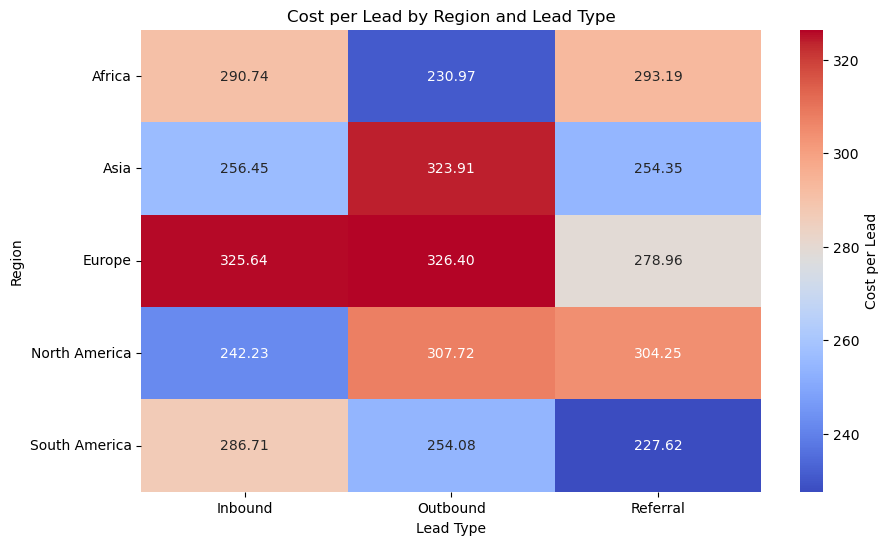

In [231]:
plt.figure(figsize=(10,6))
sns.heatmap(
    region_lead_cpl,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Cost per Lead"}
)
plt.title("Cost per Lead by Region and Lead Type")
plt.xlabel("Lead Type")
plt.ylabel("Region")
plt.show()


In [234]:
marketing_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
1,LEAD00002,Referral,Inbound,Healthcare,South America,Qualified,12,2,2024-04-11,1126.616727,0,Webinar Series,Paid,141,328.880557,First Touch
2,LEAD00003,Email Campaign,Referral,Finance,North America,Qualified,22,7,2024-03-04,32261.275084,0,Tech Expo,Organic,232,453.233800,Last Touch
3,LEAD00004,Referral,Inbound,Retail,North America,Qualified,17,6,2024-05-01,26243.583346,1,Event Booth,Referral,136,431.237498,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch


In [252]:
new_leads_df = marketing_df[marketing_df["Lead_Status"] == "New"]
new_leads_df.loc[:, "Lead_Age"] = new_leads_df["Lead_Age"].fillna(0)
new_leads_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch
6,LEAD00007,Email Campaign,Outbound,Education,North America,New,22,9,2024-03-13,32683.689758,0,Spring Promo 2024,Referral,201,491.743996,Last Touch
7,LEAD00008,Email Campaign,Outbound,Tech,South America,New,90,9,2024-04-02,9563.898699,0,Event Booth,Event,127,287.269331,Last Touch
9,LEAD00010,Referral,Outbound,Healthcare,Asia,New,50,2,2024-02-27,45388.664135,1,Webinar Series,Referral,164,123.746461,First Touch


In [256]:
new_leads_region = new_leads_df.pivot_table(
    values="Lead_Age",
    index="Region",
    columns="Lead_Source",
    aggfunc="mean"
)
new_leads_region = new_leads_region.round(2)
display(new_leads_region)

Lead_Source,Direct Traffic,Email Campaign,Google Ads,Referral,Social Media,Trade Show
Region,,,,,,
Africa,47.0,283.67,179.83,298.0,231.00,210.00
Asia,214.0,148.00,120.75,252.0,116.67,163.75
Europe,122.5,NaN,227.33,159.0,229.50,162.33
North America,138.5,117.33,195.67,349.0,149.67,147.29
South America,100.0,178.67,190.00,117.0,225.33,210.33


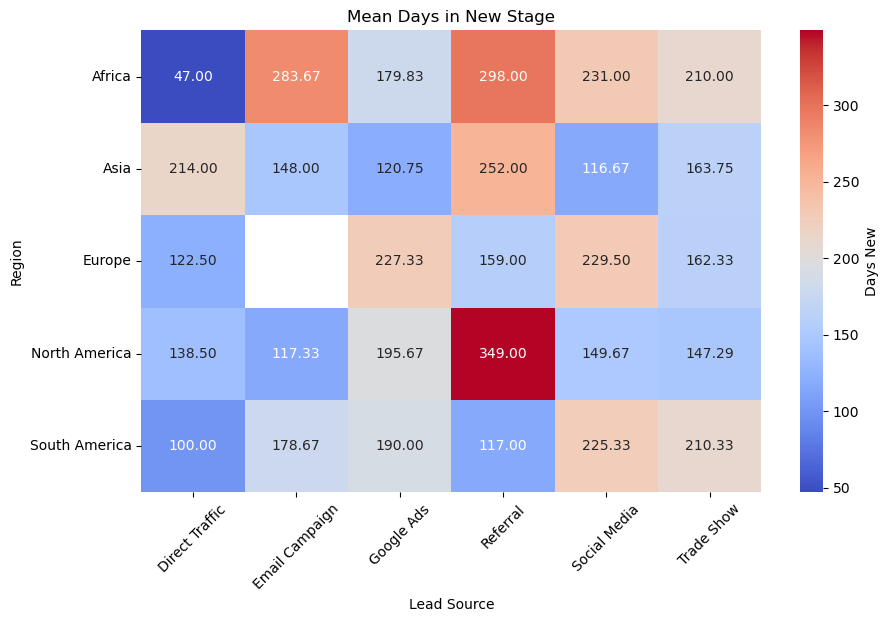

In [268]:
plt.figure(figsize=(10,6))
sns.heatmap(
    new_leads_region,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label":"Days New"}
)
plt.title("Mean Days in New Stage")
plt.xlabel("Lead Source")
plt.xticks(rotation=45)
plt.show()
    

In [274]:
# next up we're going to have a look at the engagement scores and what we can gather from their relationships
marketing_df.head()

,Lead_ID,Lead_Source,Lead_Type,Industry,Region,Lead_Status,Engagement_Score,Touchpoints_Count,Last_Engagement_Date,Deal_Size,Conversion_Flag,Campaign_Name,Marketing_Channel,Lead_Age,Cost_per_Lead,Attribution_Model
0,LEAD00001,Trade Show,Outbound,Education,Europe,New,17,4,2024-01-06,6502.912876,1,Webinar Series,Event,37,376.532240,Last Touch
1,LEAD00002,Referral,Inbound,Healthcare,South America,Qualified,12,2,2024-04-11,1126.616727,0,Webinar Series,Paid,141,328.880557,First Touch
2,LEAD00003,Email Campaign,Referral,Finance,North America,Qualified,22,7,2024-03-04,32261.275084,0,Tech Expo,Organic,232,453.233800,Last Touch
3,LEAD00004,Referral,Inbound,Retail,North America,Qualified,17,6,2024-05-01,26243.583346,1,Event Booth,Referral,136,431.237498,Last Touch
4,LEAD00005,Referral,Inbound,Retail,Africa,New,10,1,2024-03-23,30083.389887,0,Webinar Series,Referral,188,191.816168,First Touch


In [278]:
# engagement per touchpoint by Region and Lead Type
region_type_engagement = marketing_df.groupby(["Region", "Lead_Type"]).agg(
    avg_engagement=("Engagement_Score","mean"),
    touchpoints=("Touchpoints_Count", "mean")
)
display(region_type_engagement)   

avg_engagement  touchpoints
Region        Lead_Type                             
Africa        Inbound         45.037037     6.666667
              Outbound        57.166667     8.750000
              Referral        49.947368     6.526316
Asia          Inbound         46.700000     7.133333
              Outbound        55.818182     6.318182
              Referral        66.153846     8.307692
Europe        Inbound         55.117647     6.823529
              Outbound        31.705882     6.764706
              Referral        45.105263     7.736842
North America Inbound         44.736842     8.684211
              Outbound        50.258065     8.935484
              Referral        39.235294     7.764706
South America Inbound         41.000000     7.842105
              Outbound        52.619048     6.571429
              Referral        58.176471     8.000000

In [286]:
region_type_engagement = region_type_engagement[region_type_engagement["touchpoints"]>0]
engagement_per_touchpoint = (region_type_engagement["avg_engagement"] / region_type_engagement["touchpoints"])
region_type_engagement["Engagement_per_Touchpoint"] = engagement_per_touchpoint
region_type_engagement = region_type_engagement.round(2)
display(region_type_engagement)

avg_engagement  touchpoints  \
Region        Lead_Type                                
Africa        Inbound             45.04         6.67   
              Outbound            57.17         8.75   
              Referral            49.95         6.53   
Asia          Inbound             46.70         7.13   
              Outbound            55.82         6.32   
              Referral            66.15         8.31   
Europe        Inbound             55.12         6.82   
              Outbound            31.71         6.76   
              Referral            45.11         7.74   
North America Inbound             44.74         8.68   
              Outbound            50.26         8.94   
              Referral            39.24         7.76   
South America Inbound             41.00         7.84   
              Outbound            52.62         6.57   
              Referral            58.18         8.00   

                         Engagement_per_Touchpoint  
Region        Lead_Type                             
Africa        Inbound                         6.75  
              Outbound                        6.53  
              Referral                        7.65  
Asia          Inbound                         6.55  
              Outbound                        8.83  
              Referral                        7.96  
Europe        Inbound                         8.08  
              Outbound                        4.69  
              Referral                        5.83  
North America Inbound                         5.15  
              Outbound                        5.62  
              Referral                        5.06  
South America Inbound                         5.23  
              Outbound                        8.01  
              Referral                        7.27

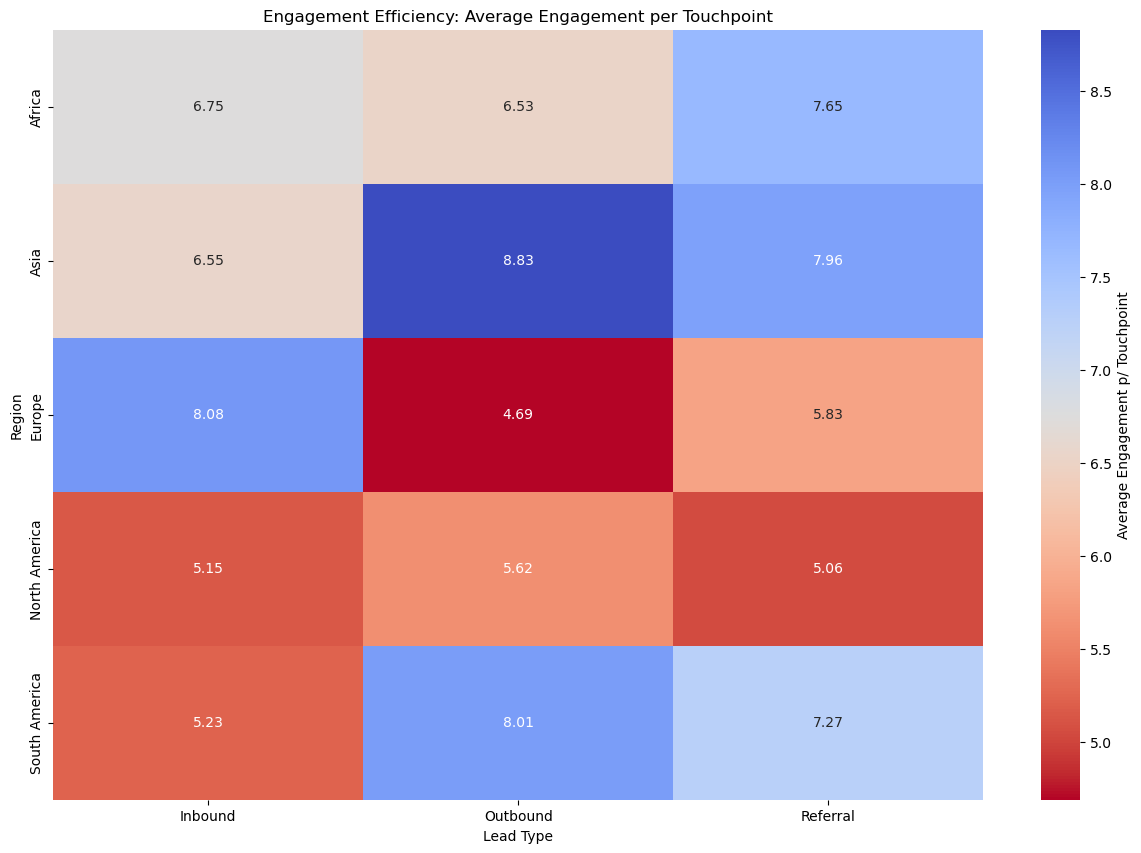

In [302]:
region_type_pivot = region_type_engagement["Engagement_per_Touchpoint"].unstack()

plt.figure(figsize=(15,10))
sns.heatmap(
    region_type_pivot,
    annot=True,
    fmt=".2f",
    cmap="coolwarm_r",
    cbar_kws={"label":"Average Engagement p/ Touchpoint"}
)
plt.title("Engagement Efficiency: Average Engagement per Touchpoint")
plt.xlabel("Lead Type")
plt.ylabel("Region")
plt.show()